# MLP architecture & Fit Non-Linear Classifier (Random Forest classifier)


Comments:
1. Derivative of the *cross-entropy* loss ($\mathcal{L}$) with a *soft-max* activation function ($\sigma$). More specifically, show that for
$$\mathcal{L}( \pmb{y},\sigma(\pmb{x})) = - \sum_{k=1}^K y_k \log( \sigma(\pmb{x})_k ) = - \sum_{k=1}^K y_k \log\left( \frac{ e^{x_k} }{ \sum_{j=1}^K e^{x_j} } \right) $$
we have:
$$\frac{\partial \mathcal{L}}{\partial x_i}  = \sigma(\pmb{x})_i - y_i = \left( \frac{ e^{x_i} }{ \sum_{j=1}^K e^{x_j} } \right) - y_i$$


## 1. MLP architecture example

Consider again the MNIST data set and fit an MLP with the same number & size of layers (64, 32, & 10), but use *sigmoid* [activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for the first two layers, and the Mean Squared Error [loss function(https://www.tensorflow.org/api_docs/python/tf/keras/losses)] at the end. Compare the test sample performance of this MLP to the more typical MLP with ReLU activation & CrossEntropy loss used in the WS8.

In [8]:
import tensorflow as tf;import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Pre-processing: Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0
mean = x_train.mean(); std = x_train.std()
x_train, x_test = (x_train - mean) / std, (x_test - mean) / std
# convert the labels to one-hot encoding
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

# minin batches
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_oh)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test_oh)).batch(1024)

## your code here

# Define the model architecture
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
    ])
# Define the loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Compile the model with the optimizer, loss function, and metrics
model_tf.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss=loss_fn, metrics=['accuracy'])
model_tf.fit(x_train, y_train_oh, epochs=3 )

# Evaluate the model on the test data
tf_test_loss, tf_test_acc = model_tf.evaluate(x_test,  y_test_oh)
avg_tf_test_loss = np.mean(tf_test_loss) ; avg_tf_test_acc = np.mean(tf_test_acc)
print("Tensor flow: Average test loss =",avg_tf_test_loss, "and Average test accuracy = ",avg_tf_test_acc)

# The test set accuracy is around 56% which is not good.
# The model is not learning well because the loss function is not appropriate for the problem.

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1680 - loss: 0.0907
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3397 - loss: 0.0833
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4924 - loss: 0.0746
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5369 - loss: 0.0682
Tensor flow: Average test loss = 0.06729047000408173 and Average test accuracy =  0.5479000210762024


## 2. Fit Non-Linear Classifier (Random Forest classifier)
Take a subset of the MNIST data and fit a *traditional* non-linear classifier such as the Random Forest classifier (RFC). Fit the RFC to the MNIST training data (use `sklearn.ensemble.RandomForestClassifier()`) and report its accuracy on the test data. Make sure to **flatten** the **images** into a $60,000 \times 784$ matrix before feeding them to the funciton, and also use the categorical instead of the one-hot responses (`y_train` instead of `y_train_oh`).


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Flatten the images for the Random Forest classifier
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

## your code here

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(x_train_flat, y_train)

# Predict on the test data
y_pred_rf = rf_clf.predict(x_test_flat)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")

## The Random Forest classifier has an accuracy of 96% which is comparable to the MLP

Random Forest Classifier Accuracy: 0.9704


## 3. MLP architecture example
Q3. We will now try our MLP on the somewhat more complex [CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10) data set. The data set consists of 60,000 32x32 color images of 10 different objects/classes (airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks), split into 50,000 training and 10,000 test cases. The following code loads and plots the first 3 images in the data set:

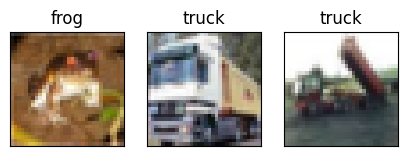

In [10]:
import matplotlib.pyplot as plt;import math;import tensorflow as tf;import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5, 2))
for i in range(3):
    plt.subplot(1, 3, i+1); plt.xticks([]); plt.yticks([]);plt.grid(False)
    plt.imshow(x_train[i]); plt.title(class_names[y_train[i][0]])
plt.show()

Specify and fit the same MLP architecture we used for the MNIST character recognition data to the CIFAR-10 data, and report the training (in-sample) and test set accuracy; what do you observe?

In [11]:
import matplotlib.pyplot as plt;import math;import tensorflow as tf;import numpy as np
# minin batches
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(1024)

# Define the model architecture
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
    ])

# Define the loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model with the optimizer, loss function, and metrics
model_tf.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss=loss_fn, metrics=['accuracy'])

# Train the model
history = model_tf.fit(x_train, y_train, epochs=10 )

# Evaluate the model on the test data
tf_test_loss, tf_test_acc = model_tf.evaluate(x_test,  y_test)
avg_tf_test_loss = np.mean(tf_test_loss) ; avg_tf_test_acc = np.mean(tf_test_acc)
print("Tensor flow: Average test loss =",avg_tf_test_loss, "and Average test accuracy = ",avg_tf_test_acc)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2287 - loss: 2.0826
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3264 - loss: 1.8473
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3552 - loss: 1.7895
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3658 - loss: 1.7562
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3763 - loss: 1.7345
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3862 - loss: 1.7048
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3934 - loss: 1.6887
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3992 - loss: 1.6827
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4063 - loss: 1.6483
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4079 - loss: 1.6443
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3805 - loss: 1.7285
Tensor flow: Average test loss = 1.74144184

Test accuracy: 0.3803


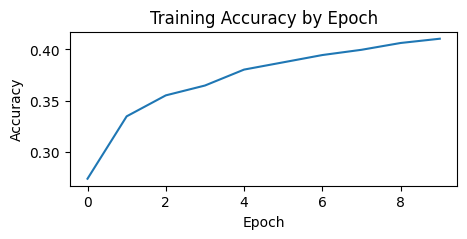

In [12]:
plt.figure(figsize=(5, 2))
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'),
plt.title('Training Accuracy by Epoch')

print(f"Test accuracy: {round(tf_test_acc,4)}")

# The resulting accuracy for CIFAR-10 is much lower than that of MNIST
# The in-sample accuracy is below 50%, and the out-of-sample is below <40%

In [13]:
# You can check the model architecture with the summary() function
model_tf.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_3 (Softmax)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,084 (777.68 KB)

 Trainable params: 199,082 (777.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)